# Introduction

This project takes all the review from the [website](https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews) which derieves reviews from trip-advisor and also displays what each customer rated based on the ratings. The ratings are based on a **star** system, from (1-5) stars. Here are the variables.

------------------------
### Here Is The Table Containing All The Details.

| Variables      | Type | Character|
| ----------- | ----------- | -----------|
| Review Text     | String      | Independent
| Stars (Ratings)   | Integer        | Dependent


# The Model Used

This model uses a [**bag of words**](https://en.wikipedia.org/wiki/Bag-of-words_model) algorithm.

## Bag Of Words (An Introduction)
This model represents an array of values in which each index represents a word. 


---

Lets take the array 

```
bag_of_words_array = [1, 1, 0, 0, 0, 5, 4, 6, 10]
#              Index: 0, 1, 2, 3, 4, 5, 6, 7, 8
```

 as an example . In this example, the array the sentence is taken from, has 1 **Start Of Sentence** character and 1 **End Of Sentence Character** Denoted by the first 2 indexes (0 & 1). The last index is always reserved for special characters like names and slang words. The typical length of the bag of words model array is 20,000 values. Also take note that special characters like (**,** & **|**) have their own unique indexes.


## Recurrent Neural Networks (RNNs)
This Notebook contains 2 parts:-
1. Classifier
2. Deep Neural Networks

The former does not use RNNs but the latter does. You can get more info about RNNs by Stanford [here](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks).

# Classifier

## Importing The Essential Librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing The Project Specific Libraries

### re
This library is used to remove any characters , apart from characters a-z & A-Z. This further reduces the training time as the unnecessary values are filtered. For example *hello!!! my name is* to *hello my name is*.

### nltk
This library not only removes unnecessary words but also stems them i.e changes each variation of a word into its base word. For example *loved* to *love*. It removes unnecessary words using the **stopwords** (that must be downloaded) library which is a set of unnecessary words that contribute nothing to the actual meaning for the sentence. For example *is* *was*.


---

The way to download stopwords is :

```
nltk.download('stopwords')
```



In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
# Downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Getting the Dataset

In [3]:
dataset = pd.read_csv("tripadvisor_hotel_reviews.csv").values

## Cleaning The Dataset
This algorithm converts the string of texts, removes the unnecessary characters and words, stems the values and splits them into a list containing **20000** values to be trained.
### Data & Their Description
1. Corpus is the array used that contains all the clean text.

In [4]:
corpus = []
for i in range(0, 10000):
  review = re.sub("^a-zA-Z", ' ', dataset[i, 0])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not') # Ignores the not value
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = " ".join(review)
  corpus.append(review)

## Implementing the Bag Of Words Model (Count Vectorizer)
The library [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) is used in the conversion of all the words into the bag of words model as described in the previous section. The **max_features** paramater specifies the maximum amount of features for the bag of words model as in our top example was 20,000. Altho that would have been ideal for a normal conversation it would not be ideal for a hotel description. The total number of features obtained from training the 10000 datasets (not to be confused with the previous conversation example). The **max_features** is especially important in a neural network as the testing as well as the trial values must be of the same shape (i.e the input dimensions must be the same for training & testing).



In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 47000)
X = cv.fit_transform(corpus).toarray()

## Getting the dependant variable

In [6]:
y = dataset[0:10000, 1]

## Splitting the data into the training & test set
This session will contain 1000 test data and 9000 training data.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

## Using Naive Bayes to train
This algorithm is going to use the Naive-Bayes algorithm to fit all the training data into the model through which we can deduce the accuracy of this model. For more information visit [here](https://scikit-learn.org/stable/modules/naive_bayes.html).

In [8]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
y_train = y_train.astype('int') #! To solidify the type
y_train = y_train.reshape(-1, 1)
nb.fit(X_train, np.array(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

## Deriving the accuracy using the test-set

### Predicting the test values

In [11]:
y_pred = nb.predict(X_test)

### Plotting The Variations

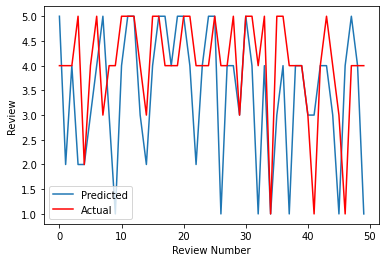

In [12]:
y_pred = y_pred[:50]
y_test = y_test[:50]
plt.xlabel("Review Number")
plt.ylabel("Review")
plt.plot(y_pred, label="Predicted")
plt.plot(y_test, label="Actual", color='red')
plt.legend()
plt.show()

### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.astype('int'), y_pred.astype('int'))
print(cm)

[[1 0 1 1 0]
 [0 1 0 0 0]
 [1 1 2 0 1]
 [5 2 4 8 5]
 [0 1 1 9 6]]
